In [11]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import madrigalWeb.madrigalWeb
import os
import h5py
import numpy as np
import math

In [12]:
#CHANGE ME
user_fullname = "Student Example"
user_email = "isr.summer.school@gmail.com"
user_affiliation = "ISR Summer School 2024"

maddat = madrigalWeb.madrigalWeb.MadrigalData('https://data.amisr.com/madrigal/')

In [13]:
#instrument codes for AMISR
instcodes={'PFISR':61,
          'RISR-N':91,
          'RISR-C':92}

In [14]:
#start time 
#This changed to our expermint (Group 5) start/End time 
st=datetime.datetime(2025,7,22,4,3,42)
et=datetime.datetime(2025,7,22,5,59,56)
expList = maddat.getExperiments(instcodes['PFISR'],
                st.year, st.month, st.day, st.hour, st.minute, st.second,
                et.year, et.month, et.day, et.hour, et.minute, et.second)
for exp in expList:
    print(exp)

id: 30003350
realUrl: http://data.amisr.com/madrigal/showExperiment/?experiment_list=30003350
url: http://data.amisr.com/madrigal/madtoc/experiments0/2025/pfa/22jul25n
name: ISRSchl2025Grp5PFTEC.v01 - Poker Flat TEC
siteid: 3
sitename: SRI
instcode: 61
instname: Poker Flat IS Radar
startyear: 2025
startmonth: 7
startday: 22
starthour: 4
startmin: 3
startsec: 42
endyear: 2025
endmonth: 7
endday: 22
endhour: 5
endmin: 59
endsec: 56
isLocal: True
madrigalUrl: http://https://data.amisr.com/madrigal
PI: Asti Bhatt
PIEmail: asti.bhatt@sri.com
uttimestamp: 1753300274
access: 0
Madrigal version: 3.4



In [15]:
# Get all the files associated with the experiment:
fileList = maddat.getExperimentFiles(expList[0].id)
for file in fileList:
    print(os.path.basename(file.name),'\tkindat:',file.kindat,'desc:',file.kindatdesc)

pfa20250722.014_ac_nenotr_01min.001.h5 	kindat: 1000201 desc: Ne From Power - Alternating Code (E-region) - 1 min
pfa20250722.014_ac_fit_01min.001.h5 	kindat: 2000201 desc: Fitted - Alternating Code (E-region) - 1 min
pfa20250722.014_ac_nenotr_03min.001.h5 	kindat: 1000203 desc: Ne From Power - Alternating Code (E-region) - 3 min
pfa20250722.014_ac_fit_03min.001.h5 	kindat: 2000203 desc: Fitted - Alternating Code (E-region) - 3 min
pfa20250722.014_ac_nenotr_05min.001.h5 	kindat: 1000205 desc: Ne From Power - Alternating Code (E-region) - 5 min
pfa20250722.014_ac_fit_05min.001.h5 	kindat: 2000205 desc: Fitted - Alternating Code (E-region) - 5 min
pfa20250722.014_ac_nenotr_10min.001.h5 	kindat: 1000210 desc: Ne From Power - Alternating Code (E-region) - 10 min
pfa20250722.014_ac_fit_10min.001.h5 	kindat: 2000210 desc: Fitted - Alternating Code (E-region) - 10 min
pfa20250722.014_ac_nenotr_15min.001.h5 	kindat: 1000215 desc: Ne From Power - Alternating Code (E-region) - 15 min
pfa20250722

In [16]:
# Download a specific file from the experiment
#Here I have changed the part from example 1 (Ne From Power) to read file (Fitted)

fileList = maddat.getExperimentFiles(expList[0].id)
lpfile=None
for file in fileList:
    if 'Fitted' in file.kindatdesc:
        if 'E-region' in  file.kindatdesc:
            if '20 min' in  file.kindatdesc:
                lpfile=file
                break
        
filename     = lpfile.name
outfilename  = os.path.basename(lpfile.name)
result = maddat.downloadFile(filename, outfilename, user_fullname, user_email, user_affiliation, 'hdf5')

In [17]:
#I used UTC here
from datetime import datetime
# from datetime import UTC as datetime_UTC

with h5py.File(outfilename,'r') as f:
    PFISR_data_E = []
    for dat in f['Data/Array Layout'].values():
        outdct={}
        outdct['bid'] = dat['1D Parameters/beamid'][0]
        outdct['azm'] = dat['1D Parameters/azm'][0]
        outdct['elm'] = dat['1D Parameters/elm'][0]
        outdct['ne'] = dat['2D Parameters/ne'][:]     # different from old SRI madrigal 2
        outdct['dne'] = dat['2D Parameters/dne'][:]   # different from old SRI madrigal 2
        outdct['te'] = dat['2D Parameters/te'][:]
        outdct['dte'] = dat['2D Parameters/dte'][:]
        outdct['ti'] = dat['2D Parameters/ti'][:]
        outdct['dti'] = dat['2D Parameters/dti'][:]
        outdct['vo'] = dat['2D Parameters/vo'][:]
        outdct['dvo'] = dat['2D Parameters/dvo'][:]
        
        outdct['range'] = dat['range'][:]
        outdct['altitude'] = outdct['range']*np.sin(np.radians(outdct['elm']))
        tstmp = dat['timestamps'][:]
        outdct['time'] = [datetime.utcfromtimestamp(t) for t in tstmp]
        # outdct['time'] = [datetime.fromtimestamp(t, UTC) for t in tstmp]
        PFISR_data_E.append(outdct)

for i,d in enumerate(PFISR_data_E):
    print(d['bid'],d['azm'],d['elm'])

fileList = maddat.getExperimentFiles(expList[0].id)
lpfile=None
for file in fileList:
    if 'Fitted' in file.kindatdesc:
        if 'F-region' in  file.kindatdesc:
            if '20 min' in  file.kindatdesc:
                lpfile=file
                break
        
filename     = lpfile.name
outfilename  = os.path.basename(lpfile.name)
result = maddat.downloadFile(filename, outfilename, user_fullname, user_email, user_affiliation, 'hdf5')

from datetime import datetime

with h5py.File(outfilename,'r') as f:
    PFISR_data_F = []
    for dat in f['Data/Array Layout'].values():
        outdct={}
        outdct['bid'] = dat['1D Parameters/beamid'][0]
        outdct['azm'] = dat['1D Parameters/azm'][0]
        outdct['elm'] = dat['1D Parameters/elm'][0]
        outdct['ne'] = dat['2D Parameters/ne'][:]     # different from old SRI madrigal 2
        outdct['dne'] = dat['2D Parameters/dne'][:]   # different from old SRI madrigal 2
        outdct['te'] = dat['2D Parameters/te'][:]
        outdct['dte'] = dat['2D Parameters/dte'][:]
        outdct['ti'] = dat['2D Parameters/ti'][:]
        outdct['dti'] = dat['2D Parameters/dti'][:]
        outdct['vo'] = dat['2D Parameters/vo'][:]
        outdct['dvo'] = dat['2D Parameters/dvo'][:]
        
        outdct['range'] = dat['range'][:]
        outdct['altitude'] = outdct['range']*np.sin(np.radians(outdct['elm']))
        tstmp = dat['timestamps'][:]
        outdct['time'] = [datetime.utcfromtimestamp(t) for t in tstmp]
        # outdct['time'] = [datetime.fromtimestamp(t, UTC) for t in tstmp]
        PFISR_data_F.append(outdct)

64016 14.039999961853027 90.0
64157 -154.3000030517578 77.5
64964 -34.689998626708984 66.08999633789062
65066 75.02999877929688 65.55999755859375


C:\Users\david\AppData\Local\Temp\ipykernel_6908\1613532585.py:13: RuntimeWarning: Mean of empty slice
  ne_mean_beam_data = np.nanmean(beam_data['ne'], 1)


Text(0.5, 1.0, 'Electron Density vs Altitude')

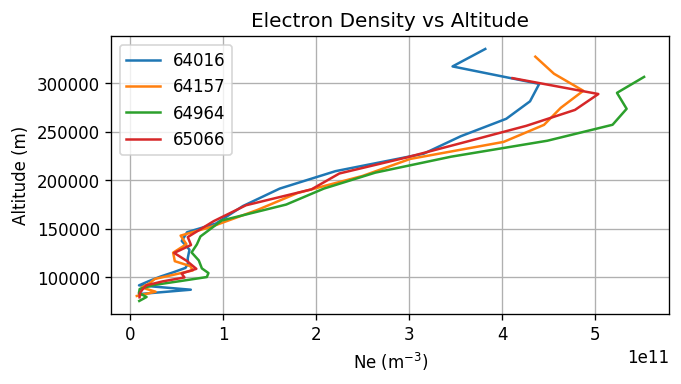

In [18]:
#find the up-B beam : 64157 az = -154.3, el = 77.5
# bind = np.argmin(np.abs(np.array([x['elm'] for x in PFISR_data]) - ( 77.5)))

fig,ax = plt.subplots(1,1, figsize=(6,3), dpi=120)

for i, beam_data in enumerate(PFISR_data_E):
    
# beam_data = PFISR_data[bind]

# Plot electron density vs alt
    start_time = np.argmin((beam_data['time'][0]))

    ne_mean_beam_data = np.nanmean(beam_data['ne'], 1)

    # ax.errorbar(beam_data['altitude'], beam_data['ne'][:, start_time],yerr=beam_data['dne'][a220v,:],label=f"Vertical ({beam_data['elm']}\u00b0 el)")
    # ax.errorbar(downdat['altitude'], downdat['ne'][:, start_time],downdat['dne'][a220d,:],label=f"Northward ({downdat['azm']}\u00b0 az, {downdat['elm']}\u00b0 el)")

    ax.plot(ne_mean_beam_data, beam_data['altitude'])

ax.legend(['64016', '64157', '64964', '65066', '64016', '64157', '64964', '65066'])
print()

ax.set_xlabel('Ne (m$^{-3}$)')
ax.set_ylabel('Altitude (m)')
ax.grid()
ax.set_title('Electron Density vs Altitude')

74
74



C:\Users\david\AppData\Local\Temp\ipykernel_6908\2930072590.py:50: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend('right', ['64016', '64157', '64964', '65066', '64016', '64157', '64964', '65066'])


(-100000000000.0, 1000000000000.0)

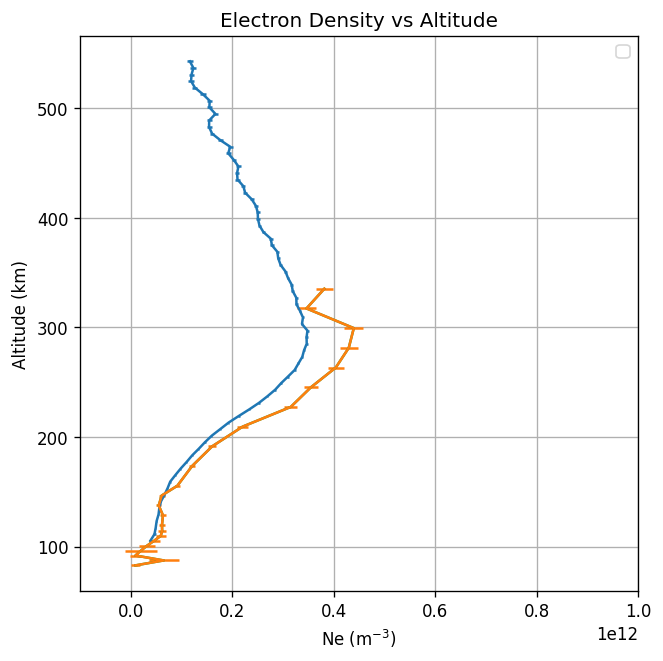

In [19]:
# Download a specific file from the experiment
#Here I have changed the part from example 1 (Ne From Power) to read file (Fitted)

#find the up-B beam : 64157 az = -154.3, el = 77.5
# bind = np.argmin(np.abs(np.array([x['elm'] for x in PFISR_data_F]) - ( 77.5)))
beam_index = 0

fig,ax = plt.subplots(1,1, figsize=(6,6), dpi=120)

for i, beam_data in enumerate(PFISR_data_F):
    
    # beam_data = PFISR_data_F[1]

    # Plot electron density vs alt
    if i == beam_index:
    # start_time = np.argmin((beam_data['time'][0]))
        
        # ne_mean_beam_data = beam_data['ne'][:, time_index]
        # ne_mean_beam_err = beam_data['dne'][:, time_index]

        ne_mean_beam_data = np.nanmean(beam_data['ne'], 1)
        ne_mean_beam_err = np.nanmean(beam_data['dne'], 1)
        ne_mean_beam_err = ne_mean_beam_err/math.sqrt(np.size(ne_mean_beam_err))

        print(np.size(ne_mean_beam_data))
        print(np.size(ne_mean_beam_err))
        ax.errorbar(ne_mean_beam_data, beam_data['altitude']/1000, xerr=ne_mean_beam_err, label=f"Vertical ({beam_data['elm']}\u00b0 el)")
        # ax.plot(ne_mean_beam_data, beam_data['altitude']/1000)

# fig,ax = plt.subplots(1,1, figsize=(6,3), dpi=120)

for i, beam_data in enumerate(PFISR_data_E):
    
    # beam_data = PFISR_data_E[0]

    # Plot electron density vs alt
    # start_time = np.argmin((beam_data['time'][0]))
    if i == beam_index:

        # ne_mean_beam_data = beam_data['ne'][:, time_index]
        # ne_mean_beam_err = beam_data['dne'][:, time_index]

        ne_mean_beam_data = np.nanmean(beam_data['ne'], 1)
        ne_mean_beam_err = np.nanmean(beam_data['dne'], 1)
        ne_mean_beam_err = ne_mean_beam_err/math.sqrt(np.size(ne_mean_beam_err))

        ax.errorbar(ne_mean_beam_data, beam_data['altitude']/1000, xerr=ne_mean_beam_err, label=f"Vertical ({beam_data['elm']}\u00b0 el)")
        ax.plot(ne_mean_beam_data, beam_data['altitude']/1000)

ax.legend('right', ['64016', '64157', '64964', '65066', '64016', '64157', '64964', '65066'])
print()

ax.set_xlabel('Ne (m$^{-3}$)')
ax.set_ylabel('Altitude (km)')
ax.grid()
ax.set_title('Electron Density vs Altitude')
# ax.set_ylim(80000, 500000)
ax.set_xlim(-1e11, 1e12)

[1.83497266 1.50717681 1.21617459 0.94802587 0.89937677 0.91243203
 0.86307714 0.9265871  0.94631839 1.08895676 1.28219613 1.51786363
 1.68179478 1.69661051 1.78125256 1.87666246 1.9003629  1.92884574
 2.077377   2.05686817 2.08969461 2.07752954 2.060552   1.93176313
 1.88370113 1.98485921 2.06660113 2.0944745  2.11850939 2.15804129
 2.10469653 2.12064169 2.10586744 2.02983506 2.18605157 2.32659339
 2.24964023 2.22728663 2.15295653 2.02647236 2.02721992 2.12070788
 1.99375132 2.02327124 2.04886493 2.06756842 1.97167892 2.07493985
 2.26791871 2.2392004  2.10250323 2.10512116 2.03635241 2.15440532
 2.07607878 1.96534849 2.26355422 2.21011944 2.58679705 2.54228723
 2.82583617 2.05405963 1.4296241  1.50163457 1.76282362 1.7381334
 1.62416601 1.5561731  1.22893831 0.78729283 1.8443323  1.38427243
 1.3639624  1.28049424]
[0.96422857 0.63833813 0.44000953 0.34883165 0.29266667 0.26631451
 0.24103197 0.22013202 0.20729466 0.18669028 0.16711165 0.15556487
 0.146184   0.1418768  0.13614165 0.133

C:\Users\david\AppData\Local\Temp\ipykernel_6908\3238155062.py:47: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend('right', ['64016', '64157', '64964', '65066', '64016', '64157', '64964', '65066'])


(-1.0, 5.0)

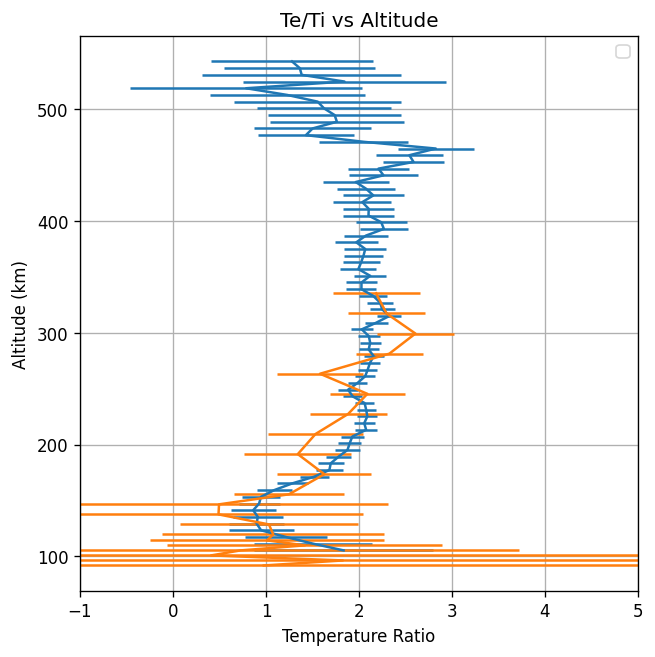

In [20]:
# plot Te/Ti (calibration is based on ratio of Te to Ti, which diverges for altitudes greater than 300km)
#use Ac up to 200km

beam_index = 0
time_index = 2

fig,ax = plt.subplots(1,1, figsize=(6,6), dpi=120)

for i, beam_data in enumerate(PFISR_data_F):
    
    if i == beam_index:
        
        te_beam_data = beam_data['te'][:, time_index]
        ti_beam_data = beam_data['ti'][:, time_index]

        te_rel_err = beam_data['dte'][:, time_index] / te_beam_data
        ti_rel_err = beam_data['dti'][:, time_index] / ti_beam_data

        temp_ratio = te_beam_data / ti_beam_data
        # temp_ratio = 1/temp_ratio
        temp_ratio_err = te_rel_err + ti_rel_err

        print(temp_ratio)
        print(temp_ratio_err)

        ax.errorbar(temp_ratio, beam_data['altitude']/1000, xerr=temp_ratio_err, label=f"Vertical ({beam_data['elm']}\u00b0 el)")

for i, beam_data in enumerate(PFISR_data_E):
    
    if i == beam_index:
        
        te_beam_data = beam_data['te'][:, time_index]
        ti_beam_data = beam_data['ti'][:, time_index]

        te_rel_err = beam_data['dte'][:, time_index] / te_beam_data
        ti_rel_err = beam_data['dti'][:, time_index] / ti_beam_data

        temp_ratio = te_beam_data / ti_beam_data
        # temp_ratio = 1/temp_ratio
        temp_ratio_err = te_rel_err + ti_rel_err

        print(temp_ratio)
        print(temp_ratio_err)

        ax.errorbar(temp_ratio, beam_data['altitude']/1000, xerr=temp_ratio_err, label=f"Vertical ({beam_data['elm']}\u00b0 el)")

ax.legend('right', ['64016', '64157', '64964', '65066', '64016', '64157', '64964', '65066'])
print()

ax.set_xlabel('Temperature Ratio')
ax.set_ylabel('Altitude (km)')
ax.grid()
ax.set_title('Te/Ti vs Altitude')
ax.set_xlim(-1,5)
# ax.set_ylim(80000, 500000)
# ax.set_xlim(-1e11, 1e12)

Long pulse
56
(55, 6)
(55,)
(55, 6)
AC pulse
(70, 6)
(70,)
(70, 6)


C:\Users\david\AppData\Local\Temp\ipykernel_6908\2782424922.py:61: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend('right', ['64016', '64157', '64964', '65066', '64016', '64157', '64964', '65066'])


Text(0.5, 1.0, 'Electron Density vs Altitude')

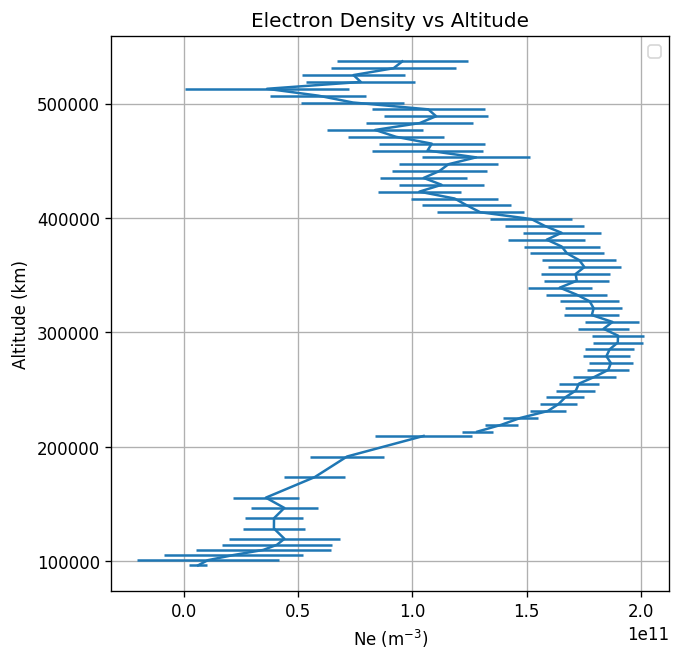

In [ ]:
# stitch together data from 0-200km for AC and 200-550km for long pulse

# Download a specific file from the experiment

beam_index = 0
time_index = 0

fig,ax = plt.subplots(1,1, figsize=(6,6), dpi=120)

stitched_data = []
stitched_alt = []
stitched_err = []


# -- Get lp data above 200km 
for i, beam_data in enumerate(PFISR_data_F):

    if i == beam_index:

        print("Long pulse")

        index_200km_lp = np.argmin(np.abs(beam_data['altitude']-200000)) +2

        print(np.size(beam_data['ne'], 0) - index_200km_lp )

        stitched_data = beam_data['ne'][index_200km_lp:-1, :]
        stitched_alt = beam_data['altitude'][index_200km_lp:-1]
        stitched_err = beam_data['dne'][index_200km_lp:-1,:]

        print(np.shape(stitched_data))
        print(np.shape(stitched_alt))
        print(np.shape(stitched_err))


# -- Get ac data below 200km
for i, beam_data in enumerate(PFISR_data_E):

    if i == beam_index:

        print("AC pulse")

        index_200km_ac = np.argmin(np.abs(beam_data['altitude']-200000)) + 2

        for j in range(np.size(beam_data['ne'][1:index_200km_ac, :], 0)): # for all times
            time_slice = np.array(beam_data['ne'][j, :])
            time_slice = np.resize(time_slice, (1, 6))
            err_slice = np.array(beam_data['dne'][j, :])
            err_slice = np.resize(err_slice, (1, 6))
            stitched_data = np.append(stitched_data, time_slice, axis=0)
            stitched_err = np.append(stitched_err, err_slice, axis=0)
        stitched_alt = np.append(stitched_alt, beam_data['altitude'][1:index_200km_ac])
    

        print(np.shape(stitched_data))
        print(np.shape(stitched_alt))
        print(np.shape(stitched_err))

ax.errorbar(stitched_data[:, time_index], stitched_alt, xerr=stitched_err[:, time_index], label=f"Vertical ({beam_data['elm']}\u00b0 el)")

ax.legend('right', ['64016', '64157', '64964', '65066', '64016', '64157', '64964', '65066'])

ax.set_xlabel('Ne (m$^{-3}$)')
ax.set_ylabel('Altitude (km)')
ax.grid()
ax.set_title('Electron Density vs Altitude')
# ax.set_ylim(80000, 500000)
# ax.set_xlim(-1e11, 1e12)